# Introduction to Regression with Neural Network in Tensorflow

There are many definition for a regression problem but in our case, we are going to simplify it. 
Predicting a numerical variable based on some other combination of variables, even shorter...
predicting a number.


In [2]:
# Import Tensorflow 
import tensorflow as tf
print(tf.__version__)

2.10.0


## Create some data to view and fit

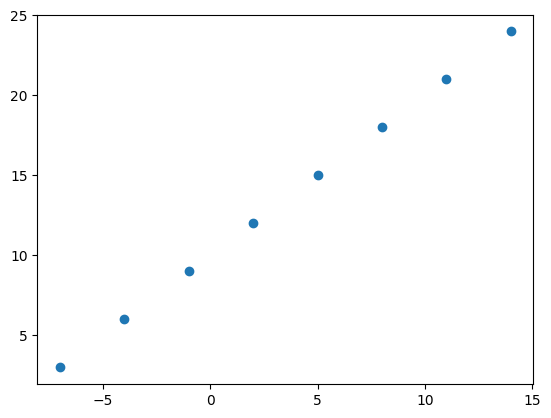

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels

y = np.array([3.0, 6.0, 9.0, 12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [4]:
# Create a demo tensor for our housing prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
#Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with tensorflow

1. Creating a Model - define the input and output layers, as well as hidden layers of a deep learning model.
2. Compiling a model - Define the loss function, the function which tells our model how wrong it is and the optimizer
    it tells us how to improve our model. And Evaluation Metrics 
3. Fitting a model - letting the model try to find patterns between X & y (feature and labels)

In [9]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"]) #Stochaistic gradient descent

#3. Fit de Model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 784ms/step - loss: 10.3687 - mae: 10.3687
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 10.2362 - mae: 10.2362
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 10.1037 - mae: 10.1037
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 9.9712 - mae: 9.9712
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 9.8387 - mae: 9.8387
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 9.7062 - mae: 9.7062
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 9.5737 - mae: 9.5737
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 9.4412 - mae: 9.4412
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 9.3087 - mae: 9.3087
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 9.1762 - mae: 9.1762


In [10]:
#Check out X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
#Try and make a prediction using our model

y_pred = model.predict([20.0])
y_pred

1/1 [==============================] - 0s 71ms/step


array([[24.993067]], dtype=float32)

In [12]:
y_pred + 7.5

array([[32.493065]], dtype=float32)

## Improve a Model 

We can improve a model by altering the steps we took to create a model.

1. Creating a model - Here we might add more layers, increase the number of hidden units or Neurons. Change Activation function of each layers
2. Compiling a model - Here we might change the optimization function or perhaps the learning rate of the optimization function
3. Fitting a Model - Here we might a model for more epochs, train it for longer. Or provide more data for learning

In [13]:
#Lets rebuild our model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 200ms/step - loss: 14.1176 - mae: 14.1176
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.9851 - mae: 13.9851
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 13.8526 - mae: 13.8526
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 13.7201 - mae: 13.7201
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 13.5876 - mae: 13.5876
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 13.4551 - mae: 13.4551
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3226 - mae: 13.3226
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 13.1901 - mae: 13.1901
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 13.0576 - mae: 13.0576
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 12.9251 - mae: 12.9251
Epoch 11/100
1/1 [==============================] - 0s 4m

1/1 [==============================] - 0s 4ms/step - loss: 6.9113 - mae: 6.9113
Epoch 89/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9056 - mae: 6.9056
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9000 - mae: 6.9000
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8944 - mae: 6.8944
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8888 - mae: 6.8888
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8831 - mae: 6.8831
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8775 - mae: 6.8775
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8719 - mae: 6.8719
Epoch 96/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8663 - mae: 6.8663
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8606 - mae: 6.8606
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8550 - ma

In [14]:
#test prediction
model.predict([17.0])

1/1 [==============================] - 0s 53ms/step


array([[29.417727]], dtype=float32)

In [15]:
#Lets rebuild our model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 391ms/step - loss: 13.5394 - mae: 13.5394
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1370 - mae: 12.1370
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9011 - mae: 10.9011
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7831 - mae: 9.7831
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4876 - mae: 8.4876
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9069 - mae: 6.9069
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 4.9880 - mae: 4.9880
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 4.2445 - mae: 4.2445
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 5.1909 - mae: 5.1909
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 5.9131 - mae: 5.9131
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

1/1 [==============================] - 0s 7ms/step - loss: 0.4131 - mae: 0.4131
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4488 - mae: 0.4488
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3101 - mae: 0.3101
Epoch 92/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2071 - mae: 0.2071
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5222 - mae: 0.5222
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4734 - mae: 0.4734
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2242 - mae: 0.2242
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2946 - mae: 0.2946
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6106 - mae: 0.6106
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4303 - mae: 0.4303
Epoch 99/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4521 - ma

In [16]:
model.predict([17.0, 20.0, 23.0])

1/1 [==============================] - 0s 69ms/step


array([[26.10041 ],
       [29.288012],
       [32.589027]], dtype=float32)

## Evaluating a Model

In practice, a typical workflow you'll go through when building a neural network is:

```
Build a model -> fit it -> evaluate it - > tweak a model ->
fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evualiation....there are 3 words you should memorize:
```
Visualize, Visualize, Visualize
```
Is a good idea to visualize:
The Data - What data are we working with. What does it look like?
The Model itself - What does are model look like
The training of a model - how does a model perform while trains
The predictions of the model - how do the predictions of a model line up

In [9]:
#Testing with a new model and prediction

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [10]:
# Make labels for the Datasets

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

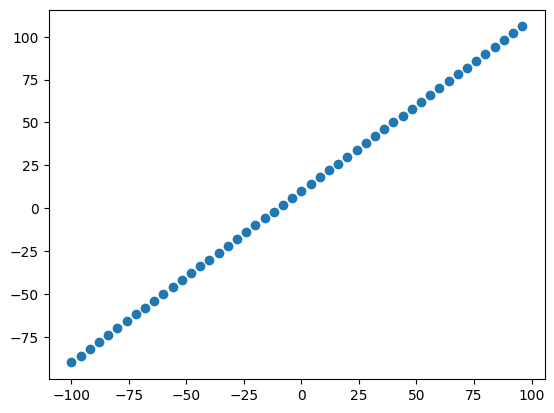

In [11]:
#Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...

* **Training set** - Model learns from this data typically 70-80% of the total data you have
* **Validation set** - The model gets tuned on this data, which is typically 10-15% of available data
* **Test Set** - The Model gets evaluated on this data to test what it learned. This set is typically 10-15% of the total data available.

In [12]:
# Check the lenght of how many samples we have
len(X)

50

In [13]:
# Split the Data into train and test

X_train = X[:40] # frist 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the Data)
y_test = y[40:]

len(X_train), len(X_test), len(y_test), len(y_train)

(40, 10, 10, 40)

### Visualizing the Data

Now we got our data split. Let's visualize it again

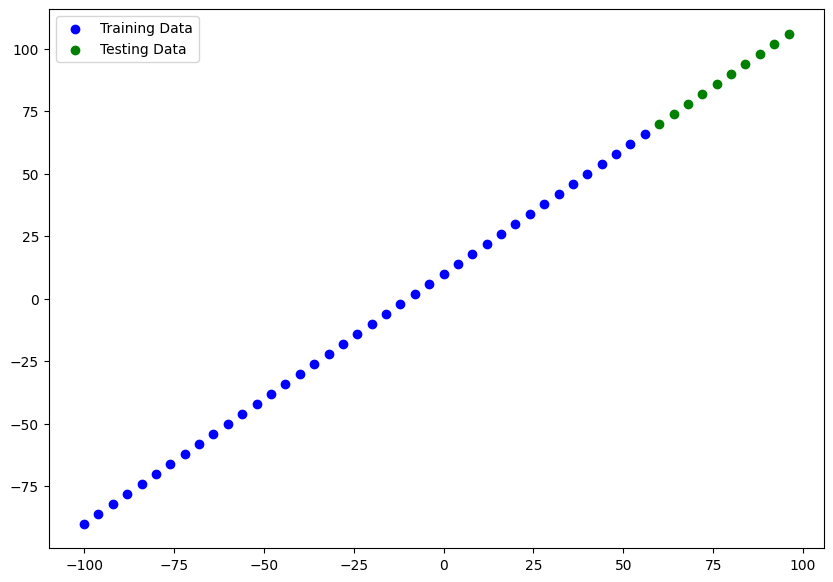

In [14]:
plt.figure(figsize=(10,7))
#plot taining data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
#plot Test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")
#show a legend
plt.legend();

In [23]:
#Let's have a look at how to build a neural network for our data

# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
#model.fit(X_train, y_train, epochs=100)

In [24]:
#Visualizing the Model

#model.summary()

In [25]:
# Lets a build a model that builds automatically defining the input_shape

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Total params - total number of parameters in the model
Trainable params - these are the parameters, patterns the model can update as it trains
Non Trainable params - these parameters arent update during training. This is typical already trained parameters

📖 **Resourse:** For more indepth information about trainable parameters within a layer, check out MIT Introduction to Deep Learning Video
introtodeeplearning

In [18]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape = [1], name="input_layer"),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="Model_1")

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

In [19]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 2s 8ms/step - loss: 38.1024 - mae: 38.1024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 34.4813 - mae: 34.4813
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 31.2749 - mae: 31.2749
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 28.0964 - mae: 28.0964
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 25.0557 - mae: 25.0557
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 22.0676 - mae: 22.0676
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7803 - mae: 18.7803
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 15.3848 - mae: 15.3848
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6588 - mae: 12.6588
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3596 - mae: 11.3596
Epoch 11/100
2/2 [==============================] - 0s 8ms/

2/2 [==============================] - 0s 6ms/step - loss: 4.2338 - mae: 4.2338
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 4.3173 - mae: 4.3173
Epoch 90/100
2/2 [==============================] - 0s 6ms/step - loss: 3.7343 - mae: 3.7343
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 3.7245 - mae: 3.7245
Epoch 92/100
2/2 [==============================] - 0s 6ms/step - loss: 4.0442 - mae: 4.0442
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 4.1433 - mae: 4.1433
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 4.0028 - mae: 4.0028
Epoch 95/100
2/2 [==============================] - 0s 6ms/step - loss: 3.8022 - mae: 3.8022
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 3.5953 - mae: 3.5953
Epoch 97/100
2/2 [==============================] - 0s 6ms/step - loss: 3.7213 - mae: 3.7213
Epoch 98/100
2/2 [==============================] - 0s 5ms/step - loss: 3.7742 - ma

In [21]:
# Get a summary of a model

model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [64]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### To visualize predictions

To visualize predictions it's a good idea to plot them agains the ground of truth

In [26]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 77ms/step


array([[ 73.62869 ],
       [ 78.42958 ],
       [ 83.230484],
       [ 88.03139 ],
       [ 92.832275],
       [ 97.63319 ],
       [102.43408 ],
       [107.234985],
       [112.03587 ],
       [116.83678 ]], dtype=float32)

In [27]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [31]:
# Lets create a plotting function

def plot_prediction(train_data = X_train,
                   train_labels=y_train,
                   test_data=X_test,
                    test_labels=y_test,
                   predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label="Testing Data")
    plt.scatter(test_data, predictions, c='r', label="Predictions")
    plt.legend();

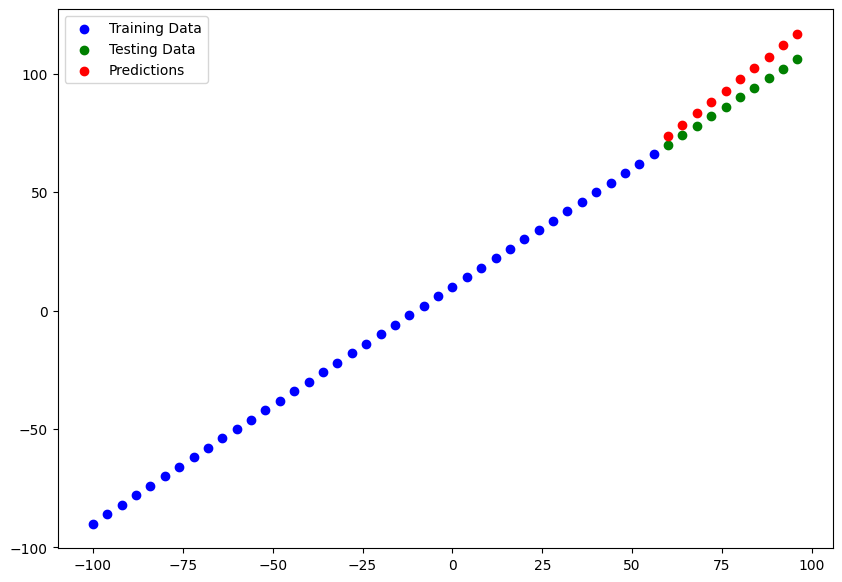

In [29]:
plot_prediction()

### Evaluating our model with an evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model performance

Since we are working with regression two of the main metrics:

* MAE - Mean Absolute Error, "On Average how wrong is each of my model's prediction

* MSE - Mean Squared Error, "Square the Average errors"

In [69]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 347ms/step - loss: 6.6662 - mae: 6.6662


[6.6661696434021, 6.6661696434021]

In [70]:
y_pred

array([[ 73.1731  ],
       [ 77.94934 ],
       [ 82.72558 ],
       [ 87.501816],
       [ 92.278046],
       [ 97.05429 ],
       [101.83052 ],
       [106.606766],
       [111.382996],
       [116.15924 ]], dtype=float32)

In [71]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [72]:
#Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.461517, 12.430395, 10.654884, 10.      , 10.455609, 12.021716,
       14.698313, 18.606766, 23.382996, 28.15924 ], dtype=float32)>

In [73]:
y_test - y_pred

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ -3,   1,   5,   9,  13,  17,  21,  25,  29,  33],
       [ -7,  -3,   1,   5,   9,  13,  17,  21,  25,  29],
       [-12,  -8,  -4,   0,   4,   8,  12,  16,  20,  24],
       [-17, -13,  -9,  -5,  -1,   3,   7,  11,  15,  19],
       [-22, -18, -14, -10,  -6,  -2,   2,   6,  10,  14],
       [-27, -23, -19, -15, -11,  -7,  -3,   1,   5,   9],
       [-31, -27, -23, -19, -15, -11,  -7,  -3,   1,   5],
       [-36, -32, -28, -24, -20, -16, -12,  -8,  -4,   0],
       [-41, -37, -33, -29, -25, -21, -17, -13,  -9,  -5],
       [-46, -42, -38, -34, -30, -26, -22, -18, -14, -10]])>

### Running experiments to improve our model

To improve your model
1. Get more Data
2. Make your model more larger or complex
3. Train for longer - more iterations

### Build `model_1`

In [15]:
X_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56])>

In [16]:
y_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66])>

In [23]:
#Set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1], name="input_layer")
])

model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 31.7166 - mae: 31.7166
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 8.9053 - mae: 8.9053
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 9.7724 - mae: 9.7724
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9482 - mae: 11.9482
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0125 - mae: 11.0125
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1728 - mae: 10.1728
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1904 - mae: 9.1904
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1270 - mae: 9.1270
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 11.7363 - mae: 11.7363
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 13.6544 - mae: 13.6544
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 11.5031 - mae: 11.5031
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 7.7937 - mae: 7.7937
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 10.9172 - mae: 10.9172
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 6.7407 - mae: 6.7407
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1096 - mae: 10.1096
Epoch 93/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6014 - mae: 7.6014
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2336 - mae: 9.2336
Epoch 95/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8251 - mae: 10.8251
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 10.2834 - mae: 10.2834
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6741 - mae: 7.6741
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 8

In [24]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 19ms/step


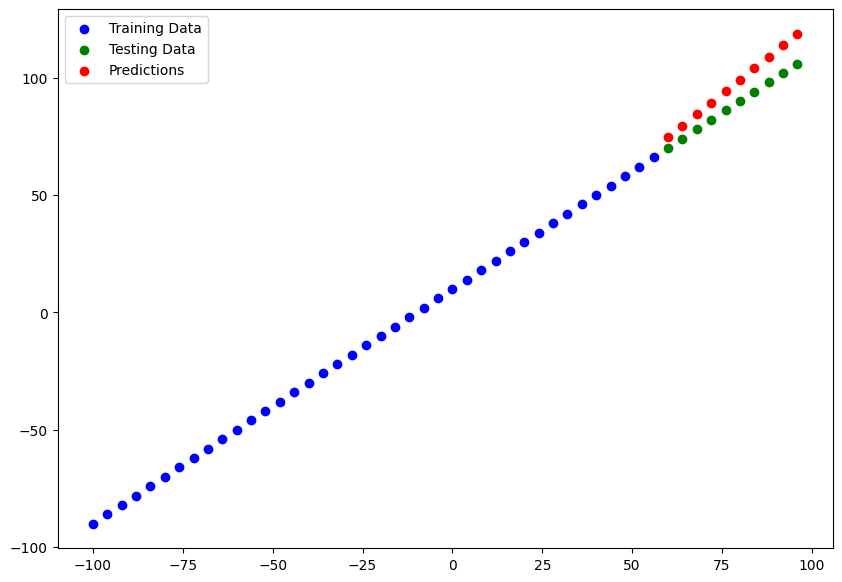

In [32]:
# Make and plot for model_1

y_pred_1 = model_1.predict(X_test)
plot_prediction(predictions=y_pred_1)

In [34]:
#Make some function to calculate mae and mse to be reutilize later

def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true= y_true,
                                         y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

In [37]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.666227>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.63689>)

In [40]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mse"])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 47.9949 - mse: 3405.3848
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 31.2165 - mse: 1304.2419
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 36.2073 - mse: 1973.0566
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.6350 - mse: 1116.7339
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.0644 - mse: 286.0727
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9828 - mse: 173.0415
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3128 - mse: 155.2308
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1611 - mse: 166.4583
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 41.2179 - mse: 2694.8364
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 28.5170 - mse: 1147.7512
Epoch 11/100
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 10.1678 - mse: 115.7113
Epoch 87/100
2/2 [==============================] - 0s 4ms/step - loss: 24.3315 - mse: 828.3157
Epoch 88/100
2/2 [==============================] - 0s 4ms/step - loss: 18.9969 - mse: 512.5504
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 7.1650 - mse: 70.2278
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 18.2607 - mse: 494.9502
Epoch 91/100
2/2 [==============================] - 0s 4ms/step - loss: 13.3104 - mse: 255.9959
Epoch 92/100
2/2 [==============================] - 0s 3ms/step - loss: 14.8614 - mse: 311.1474
Epoch 93/100
2/2 [==============================] - 0s 5ms/step - loss: 11.6534 - mse: 250.0413
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 16.2099 - mse: 371.4369
Epoch 95/100
2/2 [==============================] - 0s 4ms/step - loss: 15.5523 - mse: 322.3720
Epoch 96/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 21ms/step


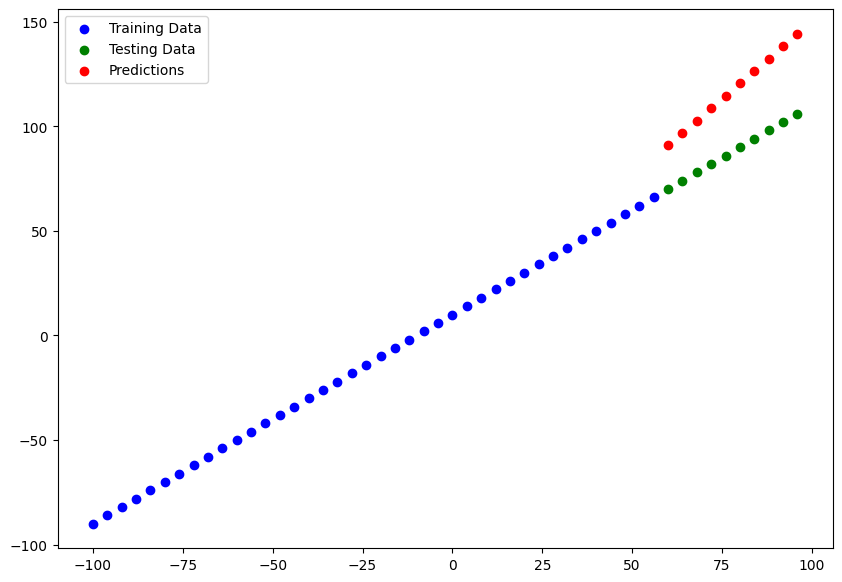

In [43]:
#Make and plot predictions for model_2

y_preds_2 = model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

In [45]:
# Calculate model_2 evaluation metrics

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.525415>,
 <tf.Tensor: shape=(), dtype=float32, numpy=902.5707>)

In [51]:
#Build Model 3

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, input_shape=[1]),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

model_2.fit(X_train, y_train, epochs=250)

Epoch 1/250
2/2 [==============================] - 0s 8ms/step - loss: 31.6827 - mse: 1405.5219
Epoch 2/250
2/2 [==============================] - 0s 5ms/step - loss: 12.4394 - mse: 270.8316
Epoch 3/250
2/2 [==============================] - 0s 6ms/step - loss: 18.7728 - mse: 576.2275
Epoch 4/250
2/2 [==============================] - 0s 5ms/step - loss: 31.7112 - mse: 1510.3390
Epoch 5/250
2/2 [==============================] - 0s 5ms/step - loss: 13.7716 - mse: 275.4280
Epoch 6/250
2/2 [==============================] - 0s 10ms/step - loss: 12.5438 - mse: 242.2212
Epoch 7/250
2/2 [==============================] - 0s 6ms/step - loss: 13.9337 - mse: 273.4825
Epoch 8/250
2/2 [==============================] - 0s 6ms/step - loss: 14.5371 - mse: 355.0155
Epoch 9/250
2/2 [==============================] - 0s 8ms/step - loss: 4.8482 - mse: 107.2412
Epoch 10/250
2/2 [==============================] - 0s 5ms/step - loss: 14.3372 - mse: 321.6202
Epoch 11/250
2/2 [=============================

2/2 [==============================] - 0s 10ms/step - loss: 12.2848 - mse: 309.1298
Epoch 87/250
2/2 [==============================] - 0s 5ms/step - loss: 11.4162 - mse: 372.2168
Epoch 88/250
2/2 [==============================] - 0s 9ms/step - loss: 23.6447 - mse: 813.8015
Epoch 89/250
2/2 [==============================] - 0s 4ms/step - loss: 19.2249 - mse: 524.4207
Epoch 90/250
2/2 [==============================] - 0s 9ms/step - loss: 9.1155 - mse: 203.9506
Epoch 91/250
2/2 [==============================] - 0s 5ms/step - loss: 12.7421 - mse: 248.8556
Epoch 92/250
2/2 [==============================] - 0s 8ms/step - loss: 25.2518 - mse: 956.3107
Epoch 93/250
2/2 [==============================] - 0s 4ms/step - loss: 15.2441 - mse: 348.8690
Epoch 94/250
2/2 [==============================] - 0s 8ms/step - loss: 11.5501 - mse: 282.3221
Epoch 95/250
2/2 [==============================] - 0s 5ms/step - loss: 19.6417 - mse: 643.4175
Epoch 96/250
2/2 [==============================] - 0

2/2 [==============================] - 0s 5ms/step - loss: 15.4310 - mse: 364.5488
Epoch 171/250
2/2 [==============================] - 0s 8ms/step - loss: 24.7558 - mse: 889.0172
Epoch 172/250
2/2 [==============================] - 0s 5ms/step - loss: 20.9073 - mse: 613.1707
Epoch 173/250
2/2 [==============================] - 0s 4ms/step - loss: 7.7323 - mse: 179.6327
Epoch 174/250
2/2 [==============================] - 0s 5ms/step - loss: 14.0237 - mse: 278.0410
Epoch 175/250
2/2 [==============================] - 0s 7ms/step - loss: 29.2053 - mse: 1236.2190
Epoch 176/250
2/2 [==============================] - 0s 5ms/step - loss: 2.8964 - mse: 29.9131
Epoch 177/250
2/2 [==============================] - 0s 7ms/step - loss: 7.5411 - mse: 223.1392
Epoch 178/250
2/2 [==============================] - 0s 4ms/step - loss: 11.7992 - mse: 244.2460
Epoch 179/250
2/2 [==============================] - 0s 4ms/step - loss: 13.4340 - mse: 238.0832
Epoch 180/250
2/2 [============================

1/1 [==============================] - 0s 62ms/step


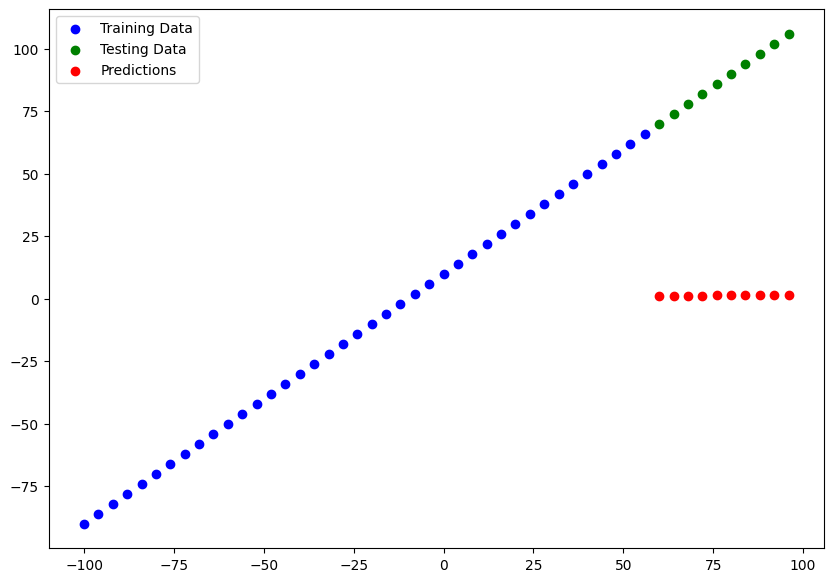

In [52]:
y_preds_3 = model_3.predict(X_test)
plot_prediction(predictions=y_preds_3)

In [48]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=122.38518>,
 <tf.Tensor: shape=(), dtype=float32, numpy=15252.166>)

In [ ]:
#Compare Results

